<a href="https://colab.research.google.com/github/TasnimKhaled-22/Soft-Computing/blob/main/BreastCancerFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
preprocessing.LabelEncoder()
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head (7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [ ]:
print("Number of rows in dataset:", len(df))
print("Number of columns in dataset:",len(df.columns))

Number of rows in dataset: 569
Number of columns in dataset: 33


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop(columns =['Unnamed: 32'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
diagnosis = df['diagnosis'].value_counts().reset_index()
diagnosis

,diagnosis,count
0,B,357
1,M,212


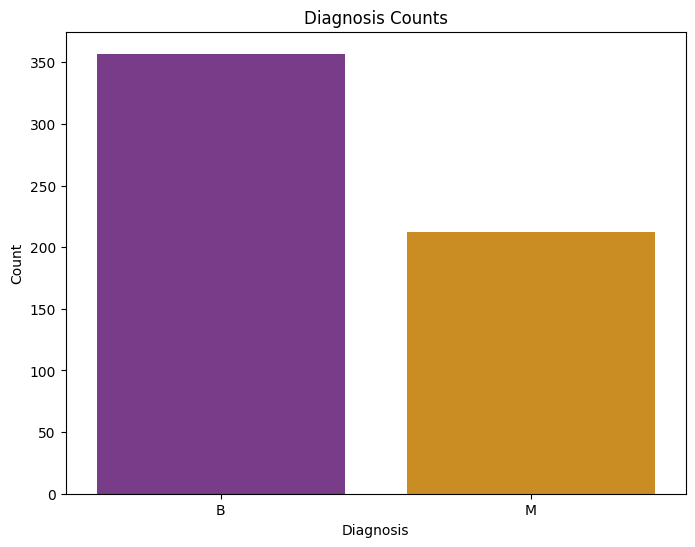

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='diagnosis', y='count', data=diagnosis, palette='CMRmap')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts')
plt.show()

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

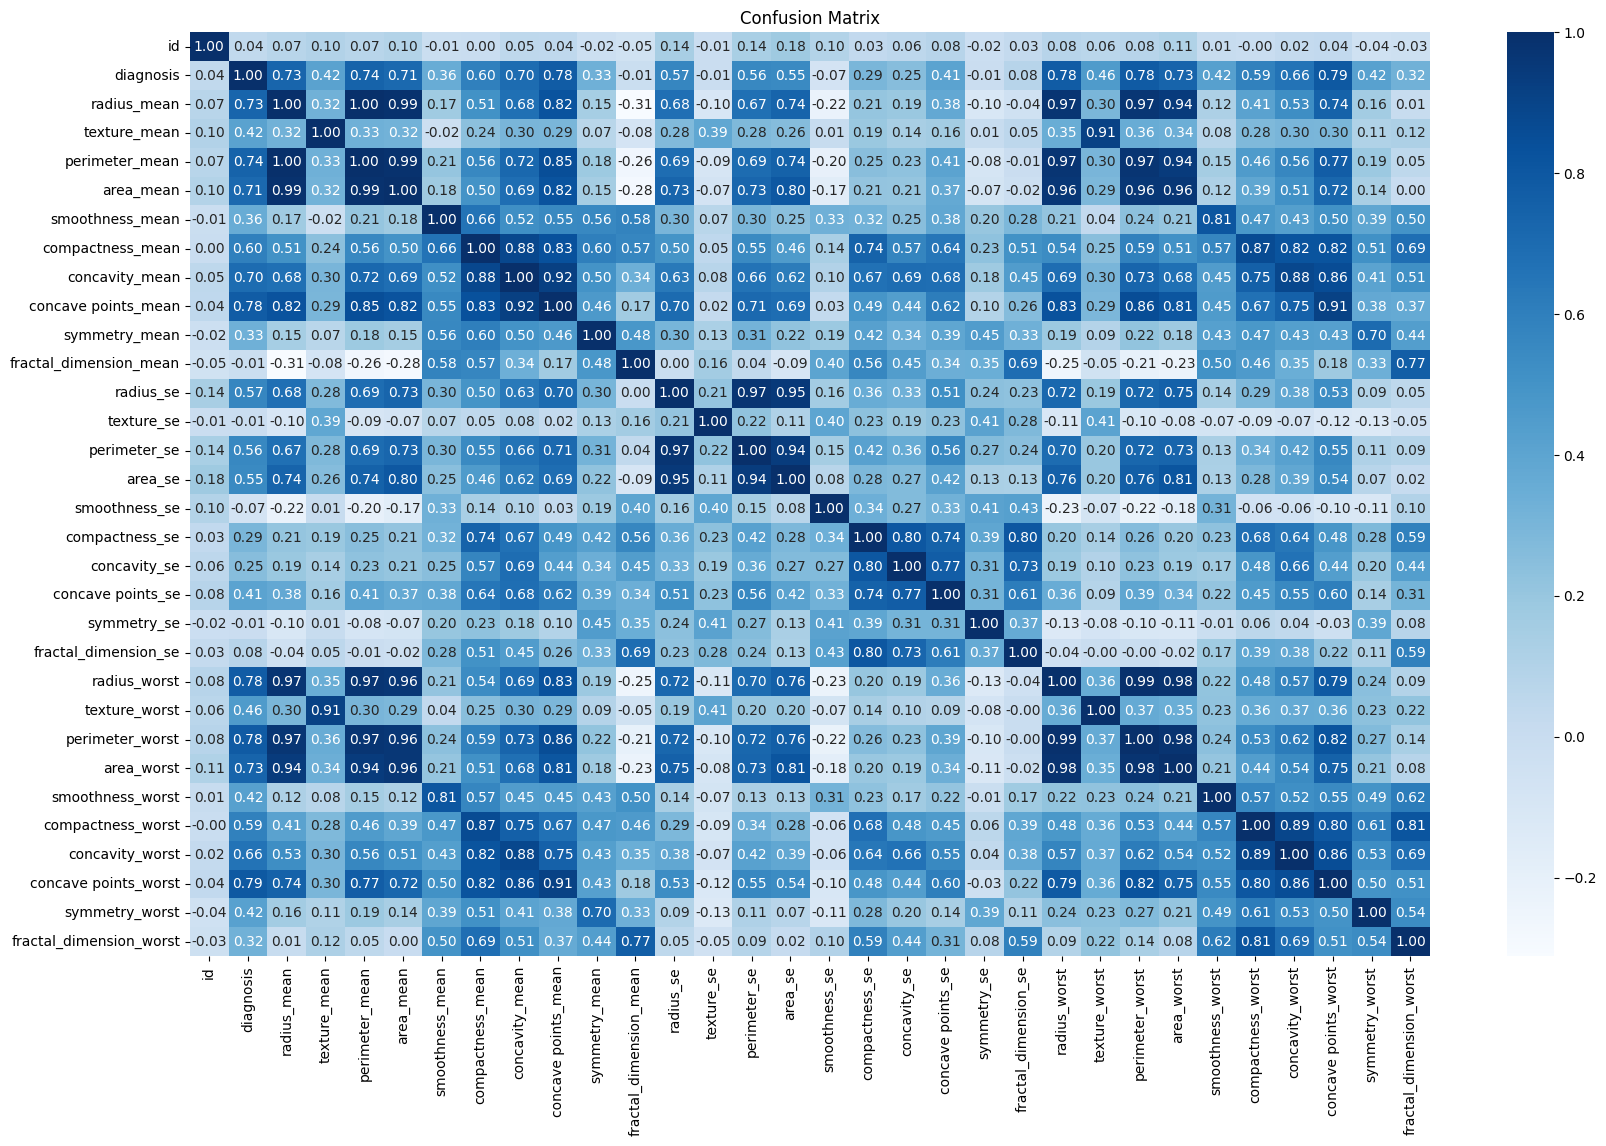

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(solver='lbfgs')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy)

Accuracy: 0.6228070175438597


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



In [ ]:
def calaculate_accuracy(x):
    X=df[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy=model.score(y_test,y_pred)
    print('Accuracy:',accuracy)
    return accuracy

In [ ]:
columnsName=df.drop(labels= 'diagnosis', axis= 1).columns.values.tolist()

In [ ]:
print(columnsName)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
columnsName1=[0,1]
chromosomes=[]
for i in range(10):
    chro1=[]
    for i in range(30):
        item = random.choice(tuple(columnsName1))
        chro1.append(item)
    chromosomes.append(chro1)

In [ ]:
def data(chromosomes1):
    chromosomes2=[]
    for i in range(len(chromosomes1)):
        if chromosomes1[i]==1:
                chromosomes2.append(columnsName[i])
    return chromosomes2

In [ ]:
def calaculate_accuracy(x):
    X=df[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)
    lgt_R = LogisticRegression(solver='lbfgs')
    lgt_R.fit(X_train, y_train)
    accuracy=lgt_R.score(X_test,y_test)
    print('Accuracy:',accuracy)
    return accuracy

In [ ]:
pb=[]
def checkpersonalnest():
    for i in range(len(chromosomes)):
         pb.append(calaculate_accuracy(data(chromosomes[i])))
checkpersonalnest()

Accuracy: 0.6257309941520468
Accuracy: 0.6491228070175439
Accuracy: 0.9473684210526315
Accuracy: 0.9590643274853801
Accuracy: 0.6432748538011696
Accuracy: 0.9298245614035088
Accuracy: 0.6491228070175439
Accuracy: 0.9239766081871345
Accuracy: 0.9590643274853801
Accuracy: 0.6842105263157895


In [ ]:
def checkvelocity(globalbest):
    velocity=[]
    for j in range(len(chromosomes)):
        velocity.append(list(0+1*(np.random.random(1)[0])*(np.array(chromosomes[j])-np.array(chromosomes[j]))+1*(np.random.random(1)[0])*(np.array(globalbest)-np.array(chromosomes[j]))))
    #print(velocity)
    return velocity

In [ ]:
def addingchromosomes(velocity):
    chromosomes2=[]
    for i in range(len(velocity)):
        nextchromo=[]
        for j in range(len(velocity[i])):
            nextchromo.append(chromosomes[i][j]+velocity[i][j])
        chromosomes2.append(nextchromo)
    return chromosomes2

In [ ]:
def normalize(chromosomes2):
    for l in range(len(chromosomes2)):
        for m in range(len(chromosomes2[l])):
            if chromosomes2[l][m]>0.5:
                chromosomes2[l][m]=1
            else:
                chromosomes2[l][m]=0
    return chromosomes2

In [ ]:
def checkpd(chromosomes2):
    personal=[]
    for i in range(len(chromosomes2)):
        personal.append(calaculate_accuracy(data(chromosomes2[i])))
    for j in range(len(personal)):
        if(personal[j]>pb[j]):
            chromosomes[j]=chromosomes2[j]
            pb[j]=personal[j]
    return personal

In [ ]:
max(pb)
ind = pb.index(max(pb))
globalbest=chromosomes[ind]
for i in range(20):
    chromosomes2=[]
    personal=[]
    velocity=checkvelocity(globalbest)
    chromosomes2=addingchromosomes(velocity)
    chromosomes2=normalize(chromosomes2)
    personal=checkpd(chromosomes2)
    globalbest=[]
    max(pb)
    ind = pb.index(max(pb))
    globalbest=chromosomes[ind]

Accuracy: 0.9415204678362573
Accuracy: 0.8888888888888888
Accuracy: 0.935672514619883
Accuracy: 0.9298245614035088
Accuracy: 0.935672514619883
Accuracy: 0.9532163742690059
Accuracy: 0.38596491228070173
Accuracy: 0.935672514619883
Accuracy: 0.9649122807017544
Accuracy: 0.9181286549707602
Accuracy: 0.9532163742690059
Accuracy: 0.9473684210526315
Accuracy: 0.9239766081871345
Accuracy: 0.9473684210526315
Accuracy: 0.9532163742690059
Accuracy: 0.935672514619883
Accuracy: 0.43859649122807015
Accuracy: 0.935672514619883
Accuracy: 0.9473684210526315
Accuracy: 0.9239766081871345
Accuracy: 0.9649122807017544
Accuracy: 0.9239766081871345
Accuracy: 0.9649122807017544
Accuracy: 0.935672514619883
Accuracy: 0.9473684210526315
Accuracy: 0.9473684210526315
Accuracy: 0.6374269005847953
Accuracy: 0.9239766081871345
Accuracy: 0.9473684210526315
Accuracy: 0.9298245614035088
Accuracy: 0.9532163742690059
Accuracy: 0.9239766081871345
Accuracy: 0.935672514619883
Accuracy: 0.935672514619883
Accuracy: 0.95321637

In [ ]:
max(pb)

0.9766081871345029

In [ ]:
ind = pb.index(max(pb))
print(ind)
globalbest=chromosomes[ind]

5


In [ ]:
print(data(globalbest))

['radius_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'radius_worst', 'perimeter_worst', 'smoothness_worst', 'symmetry_worst']


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

